<a href="https://colab.research.google.com/github/eduvaladao/aulas_escola_cbpf_XIII/blob/main/aula05_XIII_Escola_CBPF_cosmology_sn_bao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Parâmetros cosmológicos com Monte Carlo
    
<font size="2">
    
This solution was developed by Bernardo Fraga for the XIII Escola do CBPF - Curso de Introdução a Cosmologia com Python
    
**Contact:** bernardo@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [ ]:
from cosmosis.runtime.config import Inifile
from cosmosis.runtime.pipeline import LikelihoodPipeline
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.runtime.config import Inifile
from cosmosis.runtime.parameter import Parameter
from cosmosis.samplers.sampler import Sampler, ParallelSampler, Hints
import os
from cosmosis import output as output_module

%matplotlib inline

In [ ]:
!pip install seaborn

    100% |████████████████████████████████| 286kB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 117kB/s eta 0:00:01
  Found existing installation: numpy 1.14.1
    Uninstalling numpy-1.14.1:
      Successfully uninstalled numpy-1.14.1


In [ ]:
import seaborn as sns

In [ ]:
ini_SN = Inifile("demos/demo_SN.ini")
ini_BAO = Inifile("demos/demo_test.ini")

In [ ]:
pre_script = ini_SN.get('runtime', "pre_script", fallback="")
post_script = ini_SN.get('runtime', "post_script", fallback="")

In [ ]:
pipeline_SN = LikelihoodPipeline(ini_SN)

Root directory is  /cosmosis



Likelihood "riess" will be Gaussian 0.738 +/- 0.024 


Parameter Priors
----------------
cosmological_parameters--omega_m  ~ U(0.15, 0.4)
cosmological_parameters--h0       ~ U(0.5, 0.8)
cosmological_parameters--w        ~ U(-1.1, -0.7)
cosmological_parameters--omega_b  ~ delta(0.04)
cosmological_parameters--omega_k  ~ delta(0.0)
cosmological_parameters--wa       ~ U(-0.05, 0.05)
cosmological_parameters--n_s      ~ delta(0.96)
cosmological_parameters--a_s      ~ delta(2.1e-09)
cosmological_parameters--tau      ~ delta(0.08)
supernova_params--deltam          ~ U(-1.0, 1.0)
supernova_params--alpha           ~ delta(0.1367495541235401)
supernova_params--beta            ~ delta(3.1028966354347833)
supernova_params--m               ~ delta(-19.0)



In [ ]:
pipeline_BAO = LikelihoodPipeline(ini_BAO)

Root directory is  /cosmosis
-- Setting up module consistency --

-- Setting up module camb --

-- Setting up module WiggleZBao --

-- Setting up module jla --

-- Setting up module riess11 --
Likelihood "riess" will be Gaussian 0.738 +/- 0.024 

Setup all pipeline modules

Parameter Priors
----------------
cosmological_parameters--omega_m  ~ U(0.15, 0.4)
cosmological_parameters--h0       ~ U(0.5, 0.8)
cosmological_parameters--w        ~ U(-1.1, -0.7)
cosmological_parameters--omega_b  ~ delta(0.04)
cosmological_parameters--omega_k  ~ delta(0.0)
cosmological_parameters--wa       ~ U(-0.05, 0.05)
cosmological_parameters--n_s      ~ delta(0.96)
cosmological_parameters--a_s      ~ delta(2.1e-09)
cosmological_parameters--tau      ~ delta(0.08)
supernova_params--deltam          ~ U(-1.0, 1.0)
supernova_params--alpha           ~ delta(0.1367495541235401)
supernova_params--beta            ~ delta(3.1028966354347833)
supernova_params--m               ~ delta(-19.0)



In [ ]:
#sampler_method = ini.get('runtime', "sampler", fallback="").split()
sampler_method = ['metropolis']

In [ ]:
sampler_class = Sampler.registry['metropolis']
sampler_class.needs_output

True

In [ ]:
output_options = dict(ini_SN.items('output'))
output_options

{'filename': 'output/demo5_h0.txt',
 'format': 'text',
 'verbosity': 'debug',
 'privacy': 'F'}

In [ ]:
output = output_module.output_from_options(output_options, False)

DEBUG:root:CosmoSIS verbosity set to 40


In [ ]:
filename = output_options['filename']
filename, ext = os.path.splitext(filename)
filename += '.' + sampler_method[0]
filename += ext
output_options['filename'] = filename

In [ ]:
sampler = sampler_class(ini_SN, pipeline, output)

In [ ]:
distribution_hints = Hints()

In [ ]:
sampler.distribution_hints.update(distribution_hints)
sampler.config()

MCMC starting point:
     cosmological_parameters--omega_m 0.2935218978734045
     supernova_params--deltam 0.04026953204382622
     supernova_params--alpha 0.1367495541235401
     supernova_params--beta 3.1028966354347833
     supernova_params--m -19.0
Using default covariance 1% of param widths
Using the Cobaya proposal


In [ ]:
while not sampler.is_converged():
    sampler.execute()
    #Flush any output. This is to stop
    #a problem in some MPI cases where loads
    #of output is built up before being written.
    if output:
        output.flush()

Overall accepted 36 / 100 samples (36.0%)
Last 100 accepted 36 / 100 samples (36.0%)

Tuning ends at 1600 samples

Overall accepted 70 / 200 samples (35.0%)
Last 100 accepted 34 / 100 samples (34.0%)

Tuning ends at 1600 samples

Overall accepted 104 / 300 samples (34.7%)
Last 100 accepted 34 / 100 samples (34.0%)

Tuning ends at 1600 samples

Largest parameter sigma fractional change = 538.7% for param 0
Accepted since last tuning: 35.75%
Tuning cobaya proposal.
Overall accepted 143 / 400 samples (35.8%)
Last 100 accepted 39 / 100 samples (39.0%)

Tuning ends at 1600 samples

Overall accepted 181 / 500 samples (36.2%)
Last 100 accepted 38 / 100 samples (38.0%)

Tuning ends at 1600 samples

Largest parameter sigma fractional change = 42.0% for param 2
Accepted since last tuning: 40.0%
Tuning cobaya proposal.
Overall accepted 223 / 600 samples (37.2%)
Last 100 accepted 42 / 100 samples (42.0%)

Tuning ends at 1600 samples

Overall accepted 247 / 700 samples (35.3%)
Last 100 accepted 24 

In [ ]:
result_BAO = np.genfromtxt('./output/demo5_test_4.txt', usecols=(0,1,2,3,4))
result_BAO_good = result_BAO[50:,:]

In [ ]:
result_SN = np.genfromtxt('./output/demo5_SN.txt', usecols=(0,1,2,3,4))
result_SN_good = result_SN[50000:,:]

In [ ]:
result_SN_good.shape

(48400, 5)

In [ ]:
import pandas as pd

In [ ]:
df_BAO = pd.DataFrame({'Omega_m':result_BAO_good[:,0], 'w': result_BAO_good[:,2], 'h0': result_BAO_good[:,1],
                          'deltaM':result_BAO_good[:,4], 'wa':result_BAO_good[:,3]})
df_BAO.head()

,Omega_m,w,h0,deltaM,wa
0,0.283520,-0.895821,0.710631,-0.028461,-0.021562
1,0.283520,-0.895821,0.710631,-0.028461,-0.021562
2,0.291845,-0.894391,0.711318,-0.028210,-0.023363
3,0.273475,-0.900432,0.712012,-0.060483,-0.011819
4,0.284734,-0.970099,0.708507,-0.091798,-0.015337


In [ ]:
df_SN = pd.DataFrame({'Omega_m':result_SN_good[:,0], 'w': result_SN_good[:,2], 'h0': result_SN_good[:,1],
                          'deltaM':result_SN_good[:,4], 'wa':result_SN_good[:,3]})
df_SN.head()

,Omega_m,w,h0,deltaM,wa
0,0.160497,-0.707979,0.707883,-0.103273,0.043951
1,0.160497,-0.707979,0.707883,-0.103273,0.043951
2,0.160497,-0.707979,0.707883,-0.103273,0.043951
3,0.160497,-0.707979,0.707883,-0.103273,0.043951
4,0.160497,-0.707979,0.707883,-0.103273,0.043951


In [ ]:
df_result.columns

Index(['Omega_m', 'SN'], dtype='object')

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


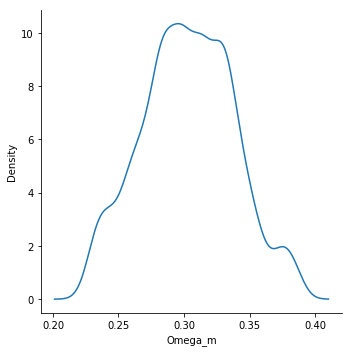

In [ ]:
sns.displot(df_result, x='Omega_m', kind='kde')
plt.show()

In [ ]:
import matplotlib.patches as mpatches
sn_leg = mpatches.Patch(color='orange', label='SN')
bao_leg = mpatches.Patch(color='b', label='SN+BAO')

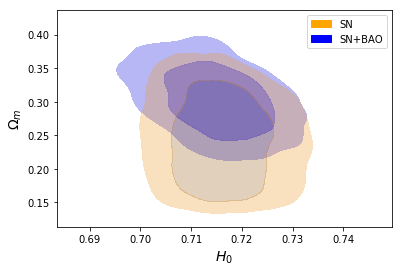

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='h0', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax, alpha=0.9, label='SN + BAO', legend=True)
sns.kdeplot(data=df_SN, x='h0', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3, label='SN', legend=True)
ax.set_ylabel(r'$\Omega_m$', fontsize=14)
ax.set_xlabel(r'$H_0$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()

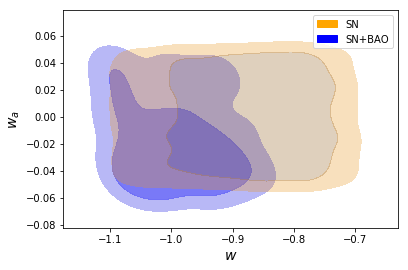

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='w', y='wa', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax, alpha=0.9, label='SN + BAO')
sns.kdeplot(data=df_SN, x='w', y='wa', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3, label='SN')
ax.set_ylabel(r'$w_a$', fontsize=14)
ax.set_xlabel(r'$w$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()

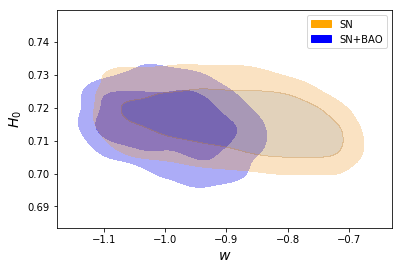

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='w', y='h0', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax)
sns.kdeplot(data=df_SN, x='w', y='h0', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3)
ax.set_ylabel(r'$H_0$', fontsize=14)
ax.set_xlabel(r'$w$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()

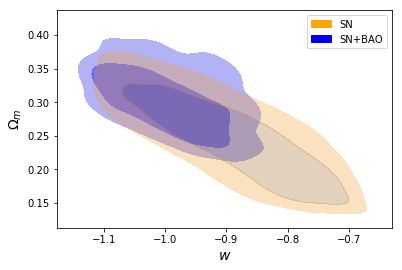

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='w', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax)
sns.kdeplot(data=df_SN, x='w', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3)
ax.set_ylabel(r'$\Omega_m$', fontsize=14)
ax.set_xlabel(r'$w$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()

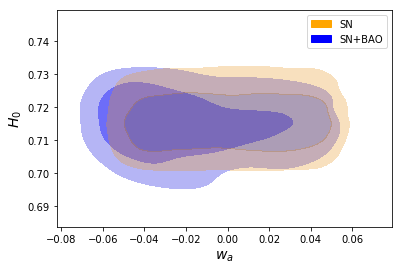

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='wa', y='h0', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax)
sns.kdeplot(data=df_SN, x='wa', y='h0', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3)
ax.set_ylabel(r'$H_0$', fontsize=14)
ax.set_xlabel(r'$w_a$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()

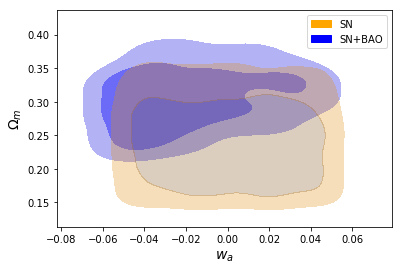

In [ ]:
f, ax = plt.subplots()
sns.kdeplot(data=df_BAO, x='wa', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='b', 
            bw_adjust=1.5, ax=ax)
sns.kdeplot(data=df_SN, x='wa', y='Omega_m', fill=True, levels=[0.05,0.32, 1], color='orange', 
            bw_adjust=1.5, ax=ax, alpha=0.3)
ax.set_ylabel(r'$\Omega_m$', fontsize=14)
ax.set_xlabel(r'$w_a$', fontsize=14)
plt.legend(handles=[sn_leg, bao_leg], loc='upper right')
plt.show()